In [34]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.utils.extmath import randomized_svd
import matplotlib.pyplot as plt
from sklearn.kernel_approximation import Nystroem
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import polynomial_kernel, rbf_kernel


(images, _), (_, _) = mnist.load_data()
images = images.reshape(images.shape[0], -1)[:10000, :]

In [21]:
print(images.shape)

(10000, 784)


In [36]:
nystroem_feature_map = Nystroem(gamma=.2, random_state=1, n_components=784)
transformed_data = nystroem_feature_map.fit_transform(images)
print(transformed_data.shape)

nystroem_feature_map_2 = Nystroem(kernel="poly", gamma=.2, random_state=1, n_components=784)
transformed_data_2 = nystroem_feature_map_2.fit_transform(images)
print(transformed_data_2.shape)

(10000, 784)
(10000, 784)


In [50]:
poly_kernel = polynomial_kernel(images)

In [51]:
# SVD
_, E_orig, _ = np.linalg.svd(images, full_matrices=False)

_, E_rbf, _ = np.linalg.svd(transformed_data, full_matrices=False)

# _, E_poly, _ = np.linalg.svd(transformed_data_2, full_matrices=False)

_, E_poly, _ = np.linalg.svd(poly_kernel, full_matrices=False)

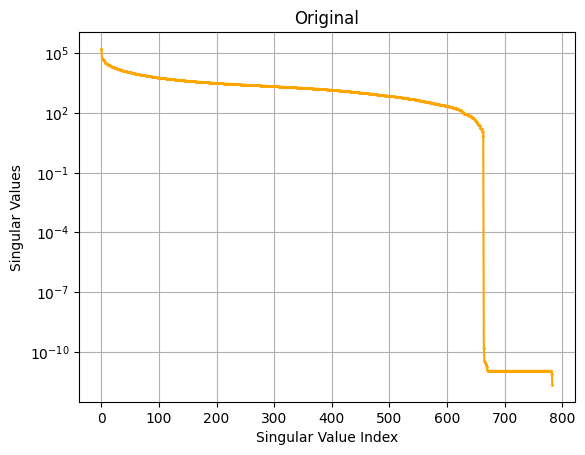

In [47]:
plt.plot(E_orig, marker='o', color='orange', markersize=1)
plt.title("Original")
plt.xlabel("Singular Value Index")
plt.ylabel("Singular Values")
plt.grid(True)
plt.yscale("log")
plt.show()

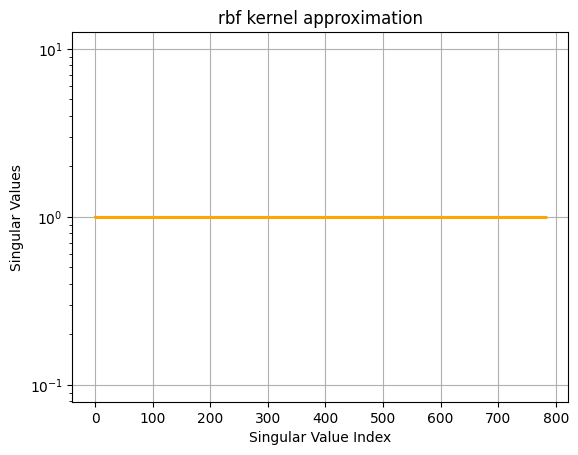

In [48]:
plt.plot(E_rbf, marker='o', color='orange', markersize=1)
plt.title("rbf kernel approximation")
plt.xlabel("Singular Value Index")
plt.ylabel("Singular Values")
plt.grid(True)
plt.yscale("log")
plt.show()

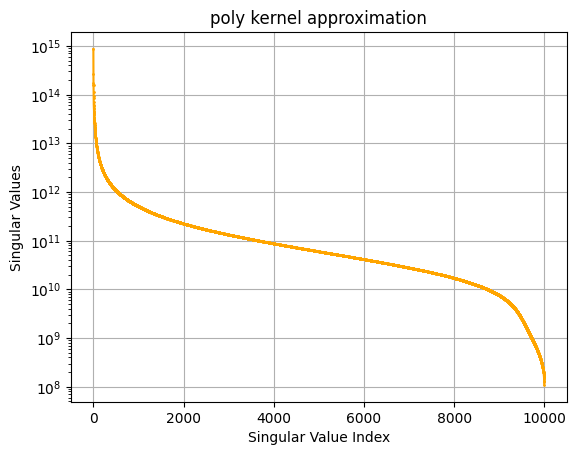

In [52]:
plt.plot(E_poly, marker='o', color='orange', markersize=1)
plt.title("poly kernel approximation")
plt.xlabel("Singular Value Index")
plt.ylabel("Singular Values")
plt.grid(True)
plt.yscale("log")
plt.show()